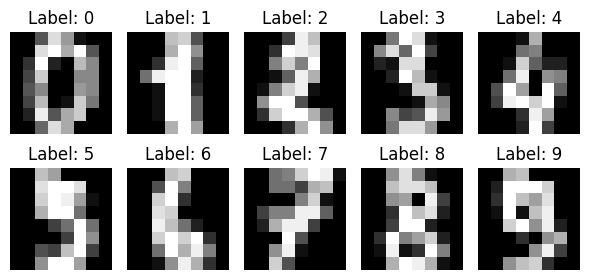

Accuracy with K=3: 0.9694444444444444
Accuracy with K=1: 0.9777777777777777
Accuracy with K=3: 0.9694444444444444
Accuracy with K=5: 0.975
Accuracy with K=7: 0.9722222222222222
Accuracy with K=9: 0.9722222222222222


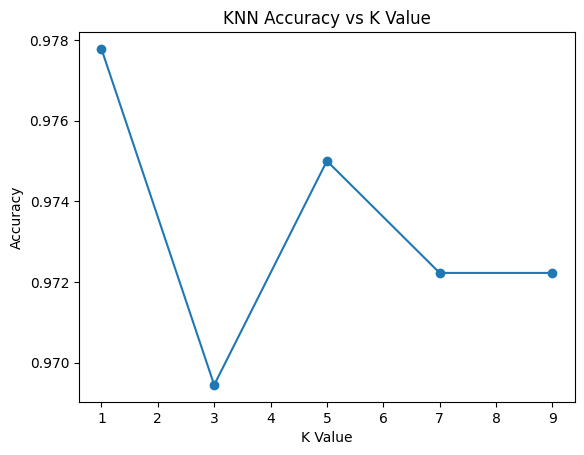

In [1]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Step 2: Load the Digits dataset
digits = load_digits()
X = digits.data      # features (pixel values)
y = digits.target    # labels (0–9)


# Step 3: Visualize some sample images
plt.figure(figsize=(6, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Step 5: Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 6: Train KNN model with initial K = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


# Step 7: Make predictions
y_pred = knn.predict(X_test)


# Step 8: Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", accuracy)


# Step 9: Try different K values
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy with K={k}: {acc}")


# Step 10: Plot Accuracy vs K
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.show()